# Problem Statement:
The purpose  is to build a machine learning model which can predict whether the employee will leave the company or not based on the 'left column.'

# Import  Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the CSV file

In [3]:
df = pd.read_csv("Company Attrition Data.csv")

# Studying the Data

In [ ]:
#viewing first five records of dataset

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#finding number of rows and columns in the data set

In [3]:
df.shape

(14999, 10)

In [ ]:
#taking the information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Sales_Occured          14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#getting the statisticaldescription of the data set

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#our target variable is left which has two values 0(who left) and 1(donot leave)

In [8]:
yes_count=(df['left']==1).sum()
no_count=(df['left']==0).sum()
yes_per= yes_count/len(df)
no_per= no_count/len(df)
print("Percentage of employee who leave=", round(yes_per*100,2))
print("Percentage of employee who will not leave=", round(no_per*100,2))

Percentage of employee who leave= 23.81
Percentage of employee who will not leave= 76.19


In [ ]:
#Here its observed that number of people who donot leave the company is more

# Data Cleaning

In [7]:
# find missing value
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

In [ ]:
#its obserevd that there is no missing value.

In [ ]:
# using for loop to find the unique values of each column

In [9]:
for column in df.columns[:]:
    print(column,": ",df[column].unique())

satisfaction_level :  [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation :  [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project :  [2 5 7 6 4 3]
average_montly_hours :  [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132

# Exploratory Data Analysis

In [ ]:
#plotting the values in target variable to visualize number of people who left and who donot

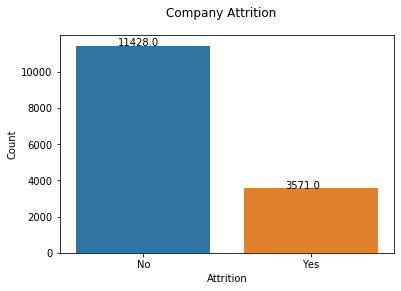

In [10]:
ax=sns.countplot(x='left',data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Attrition")
ax.figure.suptitle("Company Attrition")
plt.show()

In [ ]:
#using heat map to find the correlation between the variables

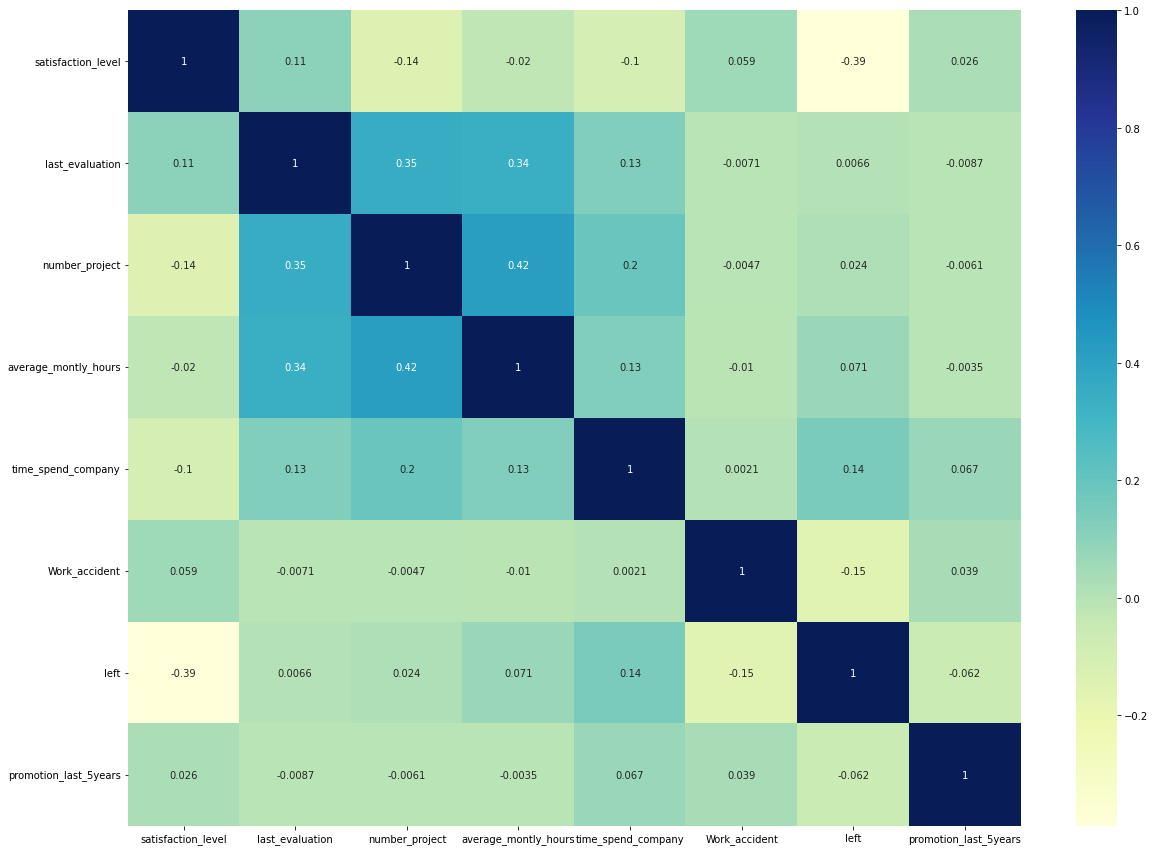

In [11]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [ ]:
#print the correlation values 

In [12]:
cor= df.corr()['left']
cor

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64

In [ ]:
#visualizing the correlation

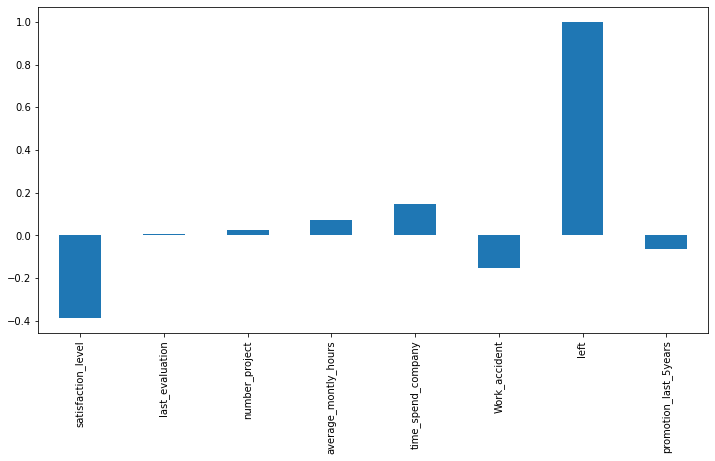

In [13]:
plt.figure(figsize=(12,6))
cor.plot(kind="bar")
plt.show()

In [ ]:
From the  negative(-) correlation between 'left' and satisfaction we can conclude people tend to leave a company more when they are less satisfied.

In [33]:
col= df.columns
col

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Sales_Occured', 'salary'],
      dtype='object')

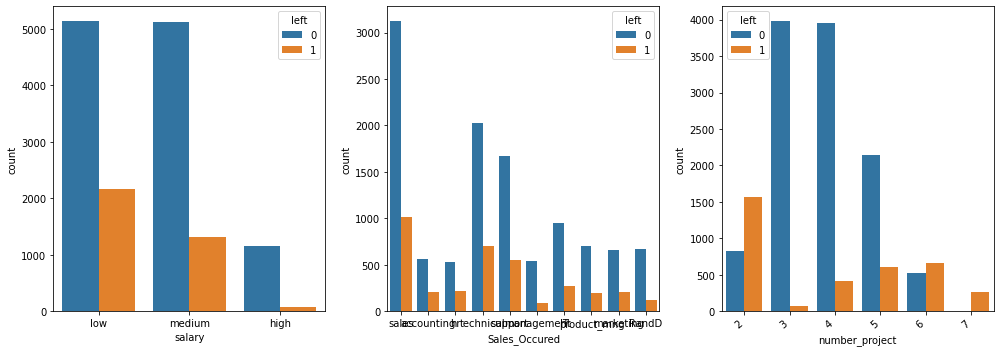

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

sns.countplot(x="salary", hue="left", data=df, ax=axes[0])
sns.countplot(x="Sales_Occured", hue="left", data=df, ax=axes[1])
sns.countplot(x="number_project", hue="left", data=df, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

# Encoding the categorical Data

In [13]:

df = pd.get_dummies(df, drop_first = True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Sales_Occured_RandD',
       'Sales_Occured_accounting', 'Sales_Occured_hr',
       'Sales_Occured_management', 'Sales_Occured_marketing',
       'Sales_Occured_product_mng', 'Sales_Occured_sales',
       'Sales_Occured_support', 'Sales_Occured_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [14]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured_RandD,Sales_Occured_accounting,Sales_Occured_hr,Sales_Occured_management,Sales_Occured_marketing,Sales_Occured_product_mng,Sales_Occured_sales,Sales_Occured_support,Sales_Occured_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
#seperating dependend and independend variables

In [15]:
x = df.drop(['left'],axis=1)
y = df['left']
print(x.shape)
print(y.shape)

(14999, 18)
(14999,)


In [ ]:
#splitting data into training and testing

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Applying standardisation

In [17]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit_transform(x_train)

array([[-0.33299672, -1.15778093, -1.4550047 , ...,  2.12125861,
        -0.97525603,  1.14967834],
       [ 0.63418845, -1.09919068,  0.96656904, ..., -0.47141824,
        -0.97525603,  1.14967834],
       [ 1.11778104,  0.42415563, -0.64781345, ..., -0.47141824,
        -0.97525603,  1.14967834],
       ...,
       [ 0.31179339,  1.30300928,  0.96656904, ..., -0.47141824,
        -0.97525603,  1.14967834],
       [ 0.67448783, -0.74764922,  0.96656904, ...,  2.12125861,
        -0.97525603, -0.86980851],
       [-0.21209858, -0.22033704,  0.96656904, ..., -0.47141824,
         1.02537177, -0.86980851]])

In [ ]:
#Applying  Machine learning Algorithms**

In [25]:
# Applying GaussianNB Algorithm
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.predict(x_train)
gnb_score=gnb.score(x_train,y_train)
gnb_score

0.7302600247642632

In [27]:
# Applying SVC Algorithm
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
svc_score=svc.score(x_train,y_train)
svc_score

0.7813125059529479

In [31]:
train_predict_SVC= svc.predict(x_train)
test_predict_SVC=svc.predict(x_test)

In [32]:
# Applying KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
test_pred_knn=knn.predict(x_test)
train_pred_knn=knn.predict(x_train)

In [34]:
knn_score=knn.score(x_train,y_train)
knn_score

0.9540908657967425

In [35]:
# Applying DecisionTree Algorithm
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
train_DT_predict= clf.predict(x_train)
test_DT_predict=clf.predict(x_test)

In [37]:
DT_score=clf.score(x_train,y_train)
DT_score

1.0

In [38]:
# Applying RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
train_predict_rfc= rfc.predict(x_train)
test_predict_rfc=rfc.predict(x_test)

In [46]:
RFC_score=rfc.score(x_train,y_train)
RFC_score

1.0

In [42]:
# Applying LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=50)
lg.fit(x_train,y_train)

C:\Users\Masna_2\anaconda3\new installation anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [44]:
LR_score=lg.score(x_train,y_train)


In [47]:
from pandas.core.frame import DataFrame
Model_Comparison = DataFrame({
    'Model' : ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Gaussian NB'],
    'Scores': [LR_score,svc_score,knn_score,DT_score,RFC_score,gnb_score]
    })
Model_Comparison

,Model,Scores
0,Logistic Regression,0.795314
1,SVM,0.781313
2,KNN,0.954091
3,Decision Tree,1.000000
4,Random Forest,1.000000
5,Gaussian NB,0.730260


In [48]:
Model_Comparison_df = Model_Comparison.sort_values(by= 'Scores', ascending=False)
Model_Comparison_df.reset_index()[Model_Comparison_df.columns]

,Model,Scores
0,Decision Tree,1.000000
1,Random Forest,1.000000
2,KNN,0.954091
3,Logistic Regression,0.795314
4,SVM,0.781313
5,Gaussian NB,0.730260


In [ ]:
**Random Forest and Decision tree is giving highest accuracy here

In [49]:
from sklearn.metrics import classification_report
cr = classification_report(y_train,train_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7966
           1       1.00      1.00      1.00      2533

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [50]:
cr = classification_report(y_test,test_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [51]:
from sklearn.metrics import confusion_matrix
conf_matix = confusion_matrix(y_test,test_predict_rfc)
conf_matix

array([[3450,   12],
       [  35, 1003]], dtype=int64)

In [ ]:
#using the feature_importance_ to find out keeping which features are neccessary for making prediction

In [52]:
rfc.feature_importances_

array([0.30772197, 0.12976836, 0.18270607, 0.15889962, 0.17877003,
       0.00861798, 0.00206455, 0.00178793, 0.00162472, 0.00151036,
       0.00184058, 0.0012708 , 0.00120323, 0.00341869, 0.00319958,
       0.00374832, 0.00794683, 0.00390041])

In [53]:
x1=pd.DataFrame(rfc.feature_importances_,columns=["Scores"])
x2=pd.DataFrame(x_train.columns,columns=["Names"])
score_rfc=pd.concat([x2,x1],axis=1)
score_rfc.sort_values("Scores",ascending=False).head()

,Names,Scores
0,satisfaction_level,0.307722
2,number_project,0.182706
4,time_spend_company,0.178770
3,average_montly_hours,0.158900
1,last_evaluation,0.129768


In [ ]:
#Conclusion
We can observe that attributes like Employee satisfaction, number of project handling,time spend at Company and average_montly_hours were the biggest factors.
So inorder to control the attrition in the company and increase the productivity :
1.provide good working environment for the employee so that their satisfaction level of working in the company is not compromised.
2.Evenly distribute the number of project among all the employees in the company.
3.Give more importance to smart work rather than hard work.
4.If employess are completing the work on time then there can be some consideration for mothly working hours.